In [1]:
!pip install -U -q google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 3.8 MB/s eta 0:00:00


#Set up API key của bạn

Để chạy cell, bạn cần lưu API Key vào khóa bí mật.
Nếu bạn chưa có khóa API, bạn có thể lấy nó từ [AI Studio](https://aistudio.google.com/app/apikey).

Để cung cấp khóa API thông qua Colab, hãy chọn biểu tượng chìa khóa bên góc trên bên trái.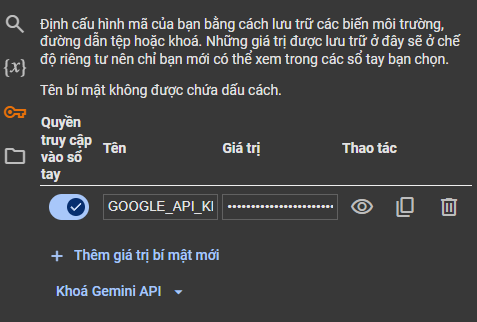

In [30]:
from google.colab import userdata
#set up api key
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

#Import thư viện

In [85]:
#Import libraries
import base64
import json

from IPython.display import Audio, Markdown, display
import numpy as np
from websockets.asyncio.client import connect
from google import genai
from google.genai import types
import json
from PIL import Image
from IPython.display import display, Markdown, HTML
import time
import PIL.Image
import io
import os
import requests
from io import BytesIO

#Tạo văn bản

In [32]:
# Initialize GenAI client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [53]:
#generate content
response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents='AI hoạt động như thế nào?'
)
print(response.text)

Trí tuệ nhân tạo (AI) là một lĩnh vực rộng lớn và có nhiều cách tiếp cận khác nhau, nhưng về cơ bản, AI hoạt động bằng cách mô phỏng khả năng nhận thức của con người để thực hiện các nhiệm vụ phức tạp. Dưới đây là một số nguyên tắc và kỹ thuật cơ bản mà AI sử dụng:

**1. Dữ liệu:**

* **Dữ liệu là nền tảng:** AI học hỏi từ dữ liệu. Càng có nhiều dữ liệu chất lượng cao, AI càng có thể học hỏi và đưa ra quyết định chính xác hơn.
* **Các loại dữ liệu:** Dữ liệu có thể ở nhiều dạng khác nhau, bao gồm văn bản, hình ảnh, âm thanh, video, dữ liệu số, v.v.
* **Xử lý dữ liệu:** Trước khi có thể sử dụng, dữ liệu thường cần được làm sạch, chuẩn hóa và chuyển đổi sang định dạng phù hợp.

**2. Thuật toán (Algorithms):**

* **Hướng dẫn cho AI:** Thuật toán là một tập hợp các quy tắc hoặc hướng dẫn để AI có thể học và giải quyết vấn đề.
* **Các loại thuật toán:** Có rất nhiều loại thuật toán AI khác nhau, mỗi loại phù hợp với một loại nhiệm vụ cụ thể. Ví dụ:
    * **Học máy (Machine Learning):** Cho 

#Tạo văn bản từ dữ liệu đầu vào là văn bản và hình ảnh

In [13]:
#download image
!gdown --id 1W8e4AvHc-iDhLTJMEbW1l5susE2keJvx

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W8e4AvHc-iDhLTJMEbW1l5susE2keJvx
To: /content/test_gemini.jpg
100% 1.37M/1.37M [00:00<00:00, 119MB/s]


In [54]:
#display image
image = PIL.Image.open("test_gemini.jpg")
display(image)
#generate content
response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents=["Tell me about this palace", image])
print(response.text)

Output hidden; open in https://colab.research.google.com to view.

#Transcribe video và tạo descriptions

In [25]:
#download video
!wget https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4

--2025-01-15 07:35:27--  https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 142.251.184.207, 64.233.179.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238090979 (227M) [video/mp4]
Saving to: ‘GreatRedSpot.mp4’

GreatRedSpot.mp4    100%[===================>] 227.06M   129MB/s    in 1.8s    

2025-01-15 07:35:29 (129 MB/s) - ‘GreatRedSpot.mp4’ saved [238090979/238090979]



In [50]:
#Select the model version
model_name = "gemini-2.0-flash-exp"

In [51]:
#function to upload and process the video
def upload_video(video_file_name):
  video_file = client.files.upload(path=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)
  print(f'Video processing complete: ' + video_file.uri)

  return video_file

# Upload the sample video 'User_study.mp4' and store the result in user_study_video
user_video = upload_video("GreatRedSpot.mp4")

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/jojhw56fl8go


In [52]:
#Generate content using the selected model and prompt
prompt = "Transcribe the audio from this video, giving timestamps for salient events in the video. Also provide visual descriptions."
video = user_video
response = client.models.generate_content(
    model=model_name,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=video.uri,
                    mime_type=video.mime_type),
                ]),
        prompt,
    ],
)

# Display the response as formatted Markdown
Markdown(response.text)


Certainly! Here's a transcription of the audio and visual descriptions with timestamps for your reference:

[00:00:00]  
_Audio:_ Jupiter is the largest and oldest planet in our solar system.
_Visual:_ The video opens with a view of Jupiter in the vast emptiness of space with a faint view of the Milky Way visible behind it. 

[00:00:04]
_Audio:_ Its history spans 4.5 billion years.
_Visual:_ The camera continues to slowly approach the planet.

[00:00:08]
_Audio:_ This gas giant is made of the same elements as a star, but it did not grow massive enough to ignite.
_Visual:_ The camera pans slowly to the right, highlighting the division between the light and dark side of the planet.

[00:00:15]
_Audio:_ Jupiter's appearance is the result of its swirling interior of gasses and liquids.
_Visual:_ The camera rotates to a view of the planet in full lighting showing its characteristic stripes. 

[00:00:20]
_Audio:_ producing a tapestry of colorful cloud bands, as well as the iconic Great Red Spot.
_Visual:_ The camera zooms in on a view of Jupiter's surface.

[00:00:27]
_Audio:_  
_Visual:_ The camera pans down further to show the swirl of the clouds creating the Great Red Spot.

[00:00:32] 
_Audio:_  
_Visual:_ The color of the surface shifts, making the Great Red Spot stand out.

[00:00:33] 
_Audio:_ The Great Red Spot is a gigantic storm.
_Visual:_ A closer view of the swirling storm, highlighted against the backdrop of the rest of Jupiter's swirling clouds.

[00:00:37]
_Audio:_ It's an anticyclone and with no landmass on the planet to slow it down.
_Visual:_ The camera pans across the spot, highlighting the chaotic movement within it. 

[00:00:41]
_Audio:_ The Great Red Spot has raged for over a century.
_Visual:_ The camera shifts to a close-up of the Great Red Spot, moving from the bottom-left corner to the top-center before disappearing into darkness.

[00:00:46]
_Audio:_
_Visual:_ The camera gives a new view of Jupiter, with a slight shift in its position.

[00:00:48]
_Audio:_ But scientists studying the spot have noticed that it has been changing over time.
_Visual:_ A box appears, showing a smaller section of Jupiter's surface around the Great Red Spot.

[00:00:52]
_Audio:_ The color is deepening and it's actually shrinking and getting rounder.
_Visual:_ The box shows images of the Great Red Spot from 1995, then 2009, then 2015.

[00:00:59]
_Audio:_ Those studying it expected to therefore see the wind speeds inside the great red spot increasing as the storm shrinks, like an ice skater who spins faster as she pulls in her arms.
_Visual:_ The screen shifts to a shot of the Great Red Spot. The dates shown in the previous images are used, overlaid on the spot.

[00:01:05]
_Audio:_
_Visual:_  A black and white video is shown of an ice skater spinning.

[00:01:11]
_Audio:_ But, this isn't the case.
_Visual:_ The black and white video of the skater continues.

[00:01:13]
_Audio:_ Data reveals the storm isn't spinning faster, it's actually getting taller.
_Visual:_ The camera shifts back to a close-up view of the Great Red Spot.

[00:01:17]
_Audio:_ You could think of it like working with pottery, as the wide lump of clay spins, forces within are driving it taller.
_Visual:_  A side-by-side view is shown of data tracking the relative height of the Great Red Spot between 2014-2017, alongside a black and white video of a potter using a pottery wheel.

[00:01:24]
_Audio:_ So from our perspective looking down on the clouds, we see the spot getting smaller and rounder.
_Visual:_ The camera returns to a view of Jupiter, with a box in the bottom left side of the screen. The box displays different views of the Great Red Spot, showing how it's changed between 1995-2015.

[00:01:31]
_Audio:_ The Great Red Spot used to be big enough to fit three Earths. Now, it's just a little over one.
_Visual:_ The box on the left side of the screen disappears, replaced by a picture of Earth at the center of the Great Red Spot.

[00:01:36]
_Audio:_ These discoveries were made by analyzing data from numerous NASA missions, including Voyager, Hubble, and most recently, Juno.
_Visual:_ A NASA Voyager satellite is shown in orbit around Jupiter.

[00:01:43]
_Audio:_
_Visual:_ A close up view of the Voyager satellite is shown.

[00:01:44]
_Audio:_
_Visual:_ The video switches to a view of the Juno satellite orbiting around the planet Jupiter.

[00:01:48]
_Audio:_
_Visual:_ The view switches back to Jupiter.

[00:01:48]
_Audio:_ And through more investigations, scientists hope to unlock more secrets of the mysterious Great Red Spot.
_Visual:_  The image of the Jupiter and the Milky Way return, with the planet in profile.

[00:01:53]
_Audio:_
_Visual:_ The camera pans back to a close up of the Great Red Spot.

[00:01:58]
_Audio:_
_Visual:_ The screen goes black.

[00:01:59]
_Audio:_ 
_Visual:_ An animation of a space probe is shown, with a bright halo around it.

[00:02:01]
_Audio:_
_Visual:_ The animation continues. A shot of the Earth is also shown.

[00:02:02]
_Audio:_
_Visual:_ The video fades out to black and ends with the NASA Goddard Space Flight Center logo.

Hope this is helpful! Let me know if you have other requests.

#Code generation


In [68]:
#prompt
code_generation_system_prompt = f"""
You are a coding assistant. Your task is to generate a code snippet that accomplishes a specific goal.
The code snippet must be concise, efficient, and well-commented for clarity.
Consider any constraints or requirements provided for the task.

If the task does not specify a programming language, default to Python.

Create a countdown timer that ticks down every second and prints "Time is up!" after 20 seconds
"""
#generate content
response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents=code_generation_system_prompt
)
print(response.text)


```python
import time

# Set the countdown duration in seconds
countdown_duration = 20

# Loop until the countdown reaches zero
while countdown_duration > 0:
    # Print the remaining time
    print(f"Time remaining: {countdown_duration} seconds")
    # Wait for one second
    time.sleep(1)
    # Decrement the countdown
    countdown_duration -= 1

# Print message when the time is up
print("Time is up!")
```



#3D box

In [69]:
#download image
!wget https://storage.googleapis.com/generativeai-downloads/images/kitchen.jpg -O kitchen.jpg -q


In [70]:
#@title 3D box visualization code

import IPython

def parse_json(json_output):
    # Parsing out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

def generate_3d_box_html(pil_image, boxes_json):
    # Convert PIL image to base64 string
    import base64
    from io import BytesIO
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    boxes_json = parse_json(boxes_json)

    return f"""
<!DOCTYPE html>
<html>
<head>
    <title>3D Box Visualization</title>
    <style>
        body {{
            margin: 0;
            padding: 0;
            background: #fff;
            color: #000;
            font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
        }}

        .view-container {{
            display: flex;
            gap: 20px;
            padding: 20px;
            flex-direction: column;
            align-items: center;
        }}

        .canvas-container {{
            display: flex;
            gap: 20px;
        }}

        .box-line {{
            position: absolute;
            background: #2962FF;
            transform-origin: 0 0;
            opacity: 1;
            box-shadow: 0 0 30px rgba(41, 98, 255, 0.4);
            transition: all 0.3s ease;
            pointer-events: none;
        }}

        .box-line.highlight {{
            background: #FF4081;
            box-shadow: 0 0 30px rgba(255, 64, 129, 0.4);
            z-index: 100;
            border-color: #FF4081 !important;
        }}

        .box-line.fade {{
            opacity: 0.3;
        }}

        .box-label {{
            position: absolute;
            color: white;
            font-size: 12px;
            font-family: Arial;
            transform: translate(-50%, -50%);
            opacity: 1;
            background: #2962FF;
            padding: 2px 8px;
            border-radius: 4px;
            box-shadow: 0 0 30px rgba(41, 98, 255, 0.4);
            transition: all 0.3s ease;
            cursor: pointer;
            z-index: 1000;
        }}

        .box-label.highlight {{
            background: #FF4081;
            box-shadow: 0 0 30px rgba(255, 64, 129, 0.4);
            transform: translate(-50%, -50%) scale(1.1);
            z-index: 1001;
        }}

        .box-label.fade {{
            opacity: 0.3;
        }}

        .box-overlay {{
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
            pointer-events: none;
        }}

        .box-overlay .box-label {{
            pointer-events: auto;
        }}

        .controls {{
            margin-top: 10px;
            background: rgba(0,0,0,0.7);
            padding: 10px 20px;
            border-radius: 8px;
            display: flex;
            align-items: center;
            gap: 10px;
        }}

        .slider-label {{
            color: white;
            font-size: 12px;
        }}

        input[type="range"] {{
            width: 200px;
        }}

        #topView {{
            width: 500px;
            height: 500px;
            background: #fff;
            border: 1px solid #333;
            position: relative;
            overflow: hidden;
        }}

        .grid-line {{
            position: absolute;
            background: #333333;
            pointer-events: none;
        }}

        .grid-label {{
            position: absolute;
            color: #666666;
            font-size: 10px;
            pointer-events: none;
        }}

        .axis-line {{
            position: absolute;
            background: #666666;
            pointer-events: none;
        }}

        .camera-triangle {{
            position: absolute;
            width: 0;
            height: 0;
            border-left: 10px solid transparent;
            border-right: 10px solid transparent;
            border-bottom: 20px solid #0000ff;
            pointer-events: none;
        }}

        .top-view-container {{
            position: relative;
        }}
    </style>
</head>
<body>
    <div class="view-container">
        <div class="canvas-container">
            <div id="container" style="position: relative;">
                <canvas id="canvas" style="background: #000;"></canvas>
                <div id="boxOverlay" class="box-overlay"></div>
                <div class="controls">
                    <span class="slider-label">FOV:</span>
                    <input type="range" id="fovSlider" min="50" max="120" value="60" step="1">
                    <span id="fovValue">60</span>
                </div>
            </div>
            <div class="top-view-container">
                <div id="topView">
                    <div id="topViewOverlay" class="box-overlay"></div>
                </div>
                <div class="controls">
                    <span class="slider-label">Zoom:</span>
                    <input type="range" id="zoomSlider" min="0.5" max="3" value="1.5" step="0.1">
                    <span id="zoomValue">1.5x</span>
                </div>
            </div>
        </div>
    </div>

    <script>
        let isDragging = {{left: false, right: false}};
        let lastX = 0;
        let lastY = 0;
        let panOffset = {{x: 0, y: 150}};
        let boxesData = {boxes_json};

        const canvas = document.getElementById('canvas');
        const ctx = canvas.getContext('2d');
        const container = document.getElementById('container');
        const topView = document.getElementById('topView');
        const topViewOverlay = document.getElementById('topViewOverlay');

        // Load and draw the image
        const img = new Image();
        img.onload = () => {{
            const aspectRatio = img.height / img.width;
            canvas.height = 500;
            canvas.width = Math.round(500 / aspectRatio);
            container.style.width = canvas.width + 'px';
            container.style.height = canvas.height + 'px';

            ctx.drawImage(img, 0, 0, canvas.width, canvas.height);

            frame.width = canvas.width;
            frame.height = canvas.height;
            annotateFrame(frame, parseFloat(fovSlider.value));
        }};
        img.src = 'data:image/png;base64,{img_str}';

        function highlightBox(label, highlight) {{
            const boxOverlay = document.getElementById('boxOverlay');
            const topViewOverlay = document.getElementById('topViewOverlay');

            [boxOverlay, topViewOverlay].forEach(overlay => {{
                const elements = overlay.querySelectorAll('.box-line, .box-label');

                elements.forEach(element => {{
                    if(element.dataset.label === label) {{
                        if(highlight) {{
                            element.classList.add('highlight');
                            element.classList.remove('fade');
                        }} else {{
                            element.classList.remove('highlight');
                            element.classList.remove('fade');
                        }}
                    }} else {{
                        if(highlight) {{
                            element.classList.add('fade');
                            element.classList.remove('highlight');
                        }} else {{
                            element.classList.remove('fade');
                            element.classList.remove('highlight');
                        }}
                    }}
                }});
            }});
        }}

        function drawTopView() {{
            topViewOverlay.innerHTML = '';

            const zoom = parseFloat(zoomSlider.value);
            const viewWidth = 400;
            const viewHeight = 400;
            const centerX = viewWidth / 2 + panOffset.x;
            const centerY = viewHeight / 2 + panOffset.y;

            for(let x = -5; x <= 5; x++) {{
                const xPixel = centerX + x * (viewWidth/10) * zoom;
                const gridLine = document.createElement('div');
                gridLine.className = 'grid-line';
                gridLine.style.left = `${{xPixel}}px`;
                gridLine.style.top = '0';
                gridLine.style.width = '1px';
                gridLine.style.height = '100%';
                topViewOverlay.appendChild(gridLine);

                const label = document.createElement('div');
                label.className = 'grid-label';
                label.textContent = x.toString();
                label.style.left = `${{xPixel}}px`;
                label.style.bottom = '5px';
                topViewOverlay.appendChild(label);
            }}

            for(let y = -5; y <= 10; y++) {{
                const yPixel = centerY - y * (viewHeight/10) * zoom;
                const gridLine = document.createElement('div');
                gridLine.className = 'grid-line';
                gridLine.style.left = '0';
                gridLine.style.top = `${{yPixel}}px`;
                gridLine.style.width = '100%';
                gridLine.style.height = '1px';
                topViewOverlay.appendChild(gridLine);

                const label = document.createElement('div');
                label.className = 'grid-label';
                label.textContent = y.toString();
                label.style.left = '5px';
                label.style.top = `${{yPixel}}px`;
                topViewOverlay.appendChild(label);
            }}

            const xAxis = document.createElement('div');
            xAxis.className = 'axis-line';
            xAxis.style.left = `${{centerX}}px`;
            xAxis.style.top = '0';
            xAxis.style.width = '2px';
            xAxis.style.height = '100%';
            topViewOverlay.appendChild(xAxis);

            const yAxis = document.createElement('div');
            yAxis.className = 'axis-line';
            yAxis.style.left = '0';
            yAxis.style.top = `${{centerY}}px`;
            yAxis.style.width = '100%';
            yAxis.style.height = '2px';
            topViewOverlay.appendChild(yAxis);

            const camera = document.createElement('div');
            camera.className = 'camera-triangle';
            camera.style.left = `${{centerX - 10}}px`;
            camera.style.top = `${{centerY - 20}}px`;
            topViewOverlay.appendChild(camera);

            boxesData.forEach(boxData => {{
                const center = boxData.box_3d.slice(0,3);
                const size = boxData.box_3d.slice(3,6);
                const rpy = boxData.box_3d.slice(6).map(x => x * Math.PI / 180);

                const centerX = viewWidth/2 + center[0] * (viewWidth/10) * zoom + panOffset.x;
                const centerY = viewHeight/2 - center[1] * (viewHeight/10) * zoom + panOffset.y;

                const box = document.createElement('div');
                box.className = 'box-line';
                box.dataset.label = boxData.label;
                box.style.width = `${{size[0] * (viewWidth/10) * zoom}}px`;
                box.style.height = `${{size[1] * (viewHeight/10) * zoom}}px`;
                box.style.left = `${{centerX - (size[0] * (viewWidth/20) * zoom)}}px`;
                box.style.top = `${{centerY - (size[1] * (viewHeight/20) * zoom)}}px`;
                box.style.transform = `rotate(${{-rpy[2]}}rad)`;
                box.style.border = '2px solid #2962FF';
                box.style.background = 'transparent';
                topViewOverlay.appendChild(box);

                const label = document.createElement('div');
                label.className = 'box-label';
                label.dataset.label = boxData.label;
                label.textContent = boxData.label;
                label.style.left = `${{centerX}}px`;
                label.style.top = `${{centerY}}px`;

                label.addEventListener('mouseenter', () => highlightBox(boxData.label, true));
                label.addEventListener('mouseleave', () => highlightBox(boxData.label, false));

                topViewOverlay.appendChild(label);
            }});
        }}

        function annotateFrame(frame, fov) {{
            const boxOverlay = document.getElementById('boxOverlay');
            boxOverlay.innerHTML = '';

            boxesData.forEach(boxData => {{
                const center = boxData.box_3d.slice(0,3);
                const size = boxData.box_3d.slice(3,6);
                const rpy = boxData.box_3d.slice(6).map(x => x * Math.PI / 180);

                const [sr, sp, sy] = rpy.map(x => Math.sin(x/2));
                const [cr, cp, cz] = rpy.map(x => Math.cos(x/2));
                const quaternion = [
                    sr * cp * cz - cr * sp * sy,
                    cr * sp * cz + sr * cp * sy,
                    cr * cp * sy - sr * sp * cz,
                    cr * cp * cz + sr * sp * sy
                ];

                const height = frame.height;
                const width = frame.width;
                const f = width / (2 * Math.tan(fov/2 * Math.PI/180));
                const cx = width/2;
                const cy = height/2;
                const intrinsics = [[f, 0, cx], [0, f, cy], [0, 0, 1]];

                const halfSize = size.map(s => s/2);
                let corners = [];
                for(let x of [-halfSize[0], halfSize[0]]) {{
                    for(let y of [-halfSize[1], halfSize[1]]) {{
                        for(let z of [-halfSize[2], halfSize[2]]) {{
                            corners.push([x, y, z]);
                        }}
                    }}
                }}
                corners = [
                    corners[1], corners[3], corners[7], corners[5],
                    corners[0], corners[2], corners[6], corners[4]
                ];

                const q = quaternion;
                const rotationMatrix = [
                    [1 - 2*q[1]**2 - 2*q[2]**2, 2*q[0]*q[1] - 2*q[3]*q[2], 2*q[0]*q[2] + 2*q[3]*q[1]],
                    [2*q[0]*q[1] + 2*q[3]*q[2], 1 - 2*q[0]**2 - 2*q[2]**2, 2*q[1]*q[2] - 2*q[3]*q[0]],
                    [2*q[0]*q[2] - 2*q[3]*q[1], 2*q[1]*q[2] + 2*q[3]*q[0], 1 - 2*q[0]**2 - 2*q[1]**2]
                ];

                const boxVertices = corners.map(corner => {{
                    const rotated = matrixMultiply(rotationMatrix, corner);
                    return rotated.map((val, idx) => val + center[idx]);
                }});

                const tiltAngle = 90.0;
                const viewRotationMatrix = [
                    [1, 0, 0],
                    [0, Math.cos(tiltAngle * Math.PI/180), -Math.sin(tiltAngle * Math.PI/180)],
                    [0, Math.sin(tiltAngle * Math.PI/180), Math.cos(tiltAngle * Math.PI/180)]
                ];

                const points = boxVertices;
                const rotatedPoints = points.map(p => matrixMultiply(viewRotationMatrix, p));
                const translatedPoints = rotatedPoints.map(p => p.map(v => v + 0));

                const vertexDistances = translatedPoints.map(p =>
                    Math.sqrt(p[0]*p[0] + p[1]*p[1] + p[2]*p[2])
                );

                const minDist = Math.min(...vertexDistances);
                const maxDist = Math.max(...vertexDistances);
                const distRange = maxDist - minDist;

                const projectedPoints = translatedPoints.map(p => matrixMultiply(intrinsics, p));
                const vertices = projectedPoints.map(p => [p[0]/p[2], p[1]/p[2]]);

                const topVertices = vertices.slice(0,4);
                const bottomVertices = vertices.slice(4,8);
                const topDistances = vertexDistances.slice(0,4);
                const bottomDistances = vertexDistances.slice(4,8);

                for(let i = 0; i < 4; i++) {{
                    const lines = [
                        {{start: topVertices[i], end: topVertices[(i + 1) % 4],
                         dist: (topDistances[i] + topDistances[(i + 1) % 4]) / 2}},
                        {{start: bottomVertices[i], end: bottomVertices[(i + 1) % 4],
                         dist: (bottomDistances[i] + bottomDistances[(i + 1) % 4]) / 2}},
                        {{start: topVertices[i], end: bottomVertices[i],
                         dist: (topDistances[i] + bottomDistances[i]) / 2}}
                    ];

                    for(let {{start, end, dist}} of lines) {{
                        const line = document.createElement('div');
                        line.className = 'box-line';
                        line.dataset.label = boxData.label;

                        const dx = end[0] - start[0];
                        const dy = end[1] - start[1];
                        const length = Math.sqrt(dx*dx + dy*dy);
                        const angle = Math.atan2(dy, dx);

                        const normalizedDist = (dist - minDist) / distRange;

                        const maxWidth = 4;
                        const minWidth = 1;
                        const width = maxWidth - normalizedDist * (maxWidth - minWidth);

                        line.style.width = `${{length}}px`;
                        line.style.height = `${{width}}px`;
                        line.style.transform = `translate(${{start[0]}}px, ${{start[1]}}px) rotate(${{angle}}rad)`;

                        boxOverlay.appendChild(line);
                    }}
                }}

                const textPosition3d = points[0].map((val, idx) =>
                    points.reduce((sum, p) => sum + p[idx], 0) / points.length
                );
                textPosition3d[2] += 0.1;

                const textPoint = matrixMultiply(intrinsics,
                    matrixMultiply(viewRotationMatrix, textPosition3d.map(v => v + 0))
                );
                const textPos = [textPoint[0]/textPoint[2], textPoint[1]/textPoint[2]];

                const label = document.createElement('div');
                label.className = 'box-label';
                label.dataset.label = boxData.label;
                label.textContent = boxData.label;
                label.style.left = `${{textPos[0]}}px`;
                label.style.top = `${{textPos[1]}}px`;

                label.addEventListener('mouseenter', () => highlightBox(boxData.label, true));
                label.addEventListener('mouseleave', () => highlightBox(boxData.label, false));

                boxOverlay.appendChild(label);
            }});
        }}

        function matrixMultiply(m, v) {{
            return m.map(row =>
                row.reduce((sum, val, i) => sum + val * v[i], 0)
            );
        }}

        const frame = {{
            width: canvas.width,
            height: canvas.height
        }};

        const fovSlider = document.getElementById('fovSlider');
        const fovValue = document.getElementById('fovValue');
        const zoomSlider = document.getElementById('zoomSlider');
        const zoomValue = document.getElementById('zoomValue');

        fovSlider.addEventListener('input', (e) => {{
            const fov = parseFloat(e.target.value);
            fovValue.textContent = `${{fov}}°`;
            annotateFrame(frame, fov);
            drawTopView();
        }});

        zoomSlider.addEventListener('input', (e) => {{
            const zoom = parseFloat(e.target.value);
            zoomValue.textContent = `${{zoom}}x`;
            drawTopView();
        }});

        function handleMouseDown(e, view) {{
            isDragging[view] = true;
            lastX = e.clientX;
            lastY = e.clientY;
        }}

        function handleMouseMove(e, view) {{
            if (isDragging[view]) {{
                const deltaX = e.clientX - lastX;
                const deltaY = e.clientY - lastY;

                if (view === 'left') {{
                    boxesData = boxesData.map(boxData => {{
                        const newBox3d = [...boxData.box_3d];
                        newBox3d[0] += deltaX * 0.001;
                        newBox3d[2] -= deltaY * 0.001;
                        return {{...boxData, box_3d: newBox3d}};
                    }});
                }} else {{
                    panOffset.x += deltaX;
                    panOffset.y += deltaY;
                }}

                lastX = e.clientX;
                lastY = e.clientY;

                annotateFrame(frame, parseFloat(fovSlider.value));
                drawTopView();
            }}
        }}

        function handleMouseUp(view) {{
            isDragging[view] = false;
        }}

        canvas.addEventListener('mousedown', (e) => handleMouseDown(e, 'left'));
        canvas.addEventListener('mousemove', (e) => handleMouseMove(e, 'left'));
        canvas.addEventListener('mouseup', () => handleMouseUp('left'));
        canvas.addEventListener('mouseleave', () => handleMouseUp('left'));

        topView.addEventListener('mousedown', (e) => handleMouseDown(e, 'right'));
        topView.addEventListener('mousemove', (e) => handleMouseMove(e, 'right'));
        topView.addEventListener('mouseup', () => handleMouseUp('right'));
        topView.addEventListener('mouseleave', () => handleMouseUp('right'));

        annotateFrame(frame, 60);
        drawTopView();
    </script>
</body>
</html>
"""



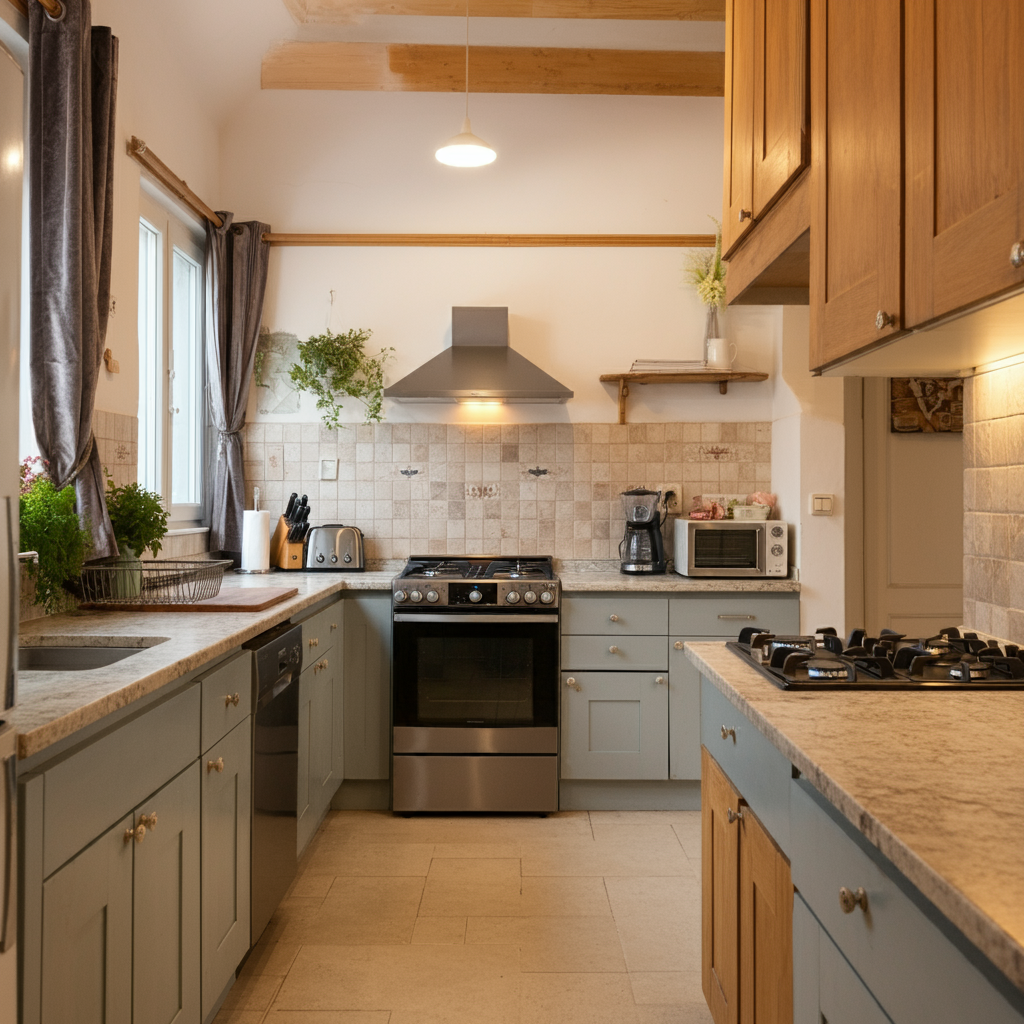

In [71]:
# Load the selected image
img = Image.open("kitchen.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Detect the 3D bounding boxes of range hood, stove top, oven, counter top, plants, shelf, cabinets
          Output a json list where each entry contains the object name in "label" and its 3D bounding box in "box_3d"
          The 3D bounding box format should be [x_center, y_center, z_center, x_size, y_size, z_size, roll, pitch, yaw].
        """
      ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the 3D boundinx boxes
IPython.display.HTML(generate_3d_box_html(img, image_response.text))